### Repräsentation der Daten

In [1]:
# Einige vorbereitende Imports und Definitionen
# insb. um die Verwendung von Typannotationen zu ermöglichen
from __future__ import annotations 
from typing import List

Die Klasse `Datensatz` ist (wie der Name impliziert) ein reiner Datencontainer. Wir verwenden daher eine Python *dataclass* (s. z.B. [dieses Tutorial](https://einfachpython.de/python-dataclasses-in-beispielen-erklaert/)).  `order=True` erzeugt automatisch Methoden, die `Datensatz`-Objekte vergleichbar und damit insb. *sortierbar* machen.

Die Methode `manhattan` implementiert die Lösung zu Aufgabe 4.1.3

In [2]:
from dataclasses import dataclass

@dataclass(order=True)
class Datensatz:
    ha_quote: int
    fehltage: int
    label: int = -1   # default: ungelabelt

    def manhattan(self, ds2: Datensatz) -> int:
        return abs(self.ha_quote - ds2.ha_quote) + abs(self.fehltage - ds2.fehltage)


### Beispieldaten zur Vorhersage von Noten
Der folgende Datensatz zeigt den für die Bearbeitung der Aufgabe relevante Ausschnitt. Er sagt vorher, ob 
- zwischen 15 und 10 Punkte (Label 0), 
- zwischen 9 und 5 Punkten (Label 1) oder 
- weniger als 5 Punkte (Label 2) 
erreicht werden.

In [3]:
ha_quote = [87, 80, 77, 75, 85, 84, 91, 77, 87, 92, 93, 72, 97, 94, 89, 96]
fehltage = [15, 17, 11, 25, 14, 10,  2,  7,  9, 10, 17, 20,  2,  6, 12,  3]
labels   = [ 2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0]

ha_quote += [72, 74, 82, 90, 98, 93]
fehltage += [ 2, 20, 14,  5,  8,  4]
labels   += [ 2,  2,  1,  0,  0,  0]

Nun wandeln wir die Einzeldaten in Objekte der Klasse `Datensatz` um:

In [4]:
daten: List[Datensatz] = [Datensatz(*hfl) for hfl in zip(ha_quote, fehltage, labels)]
print(daten)

[Datensatz(ha_quote=87, fehltage=15, label=2), Datensatz(ha_quote=80, fehltage=17, label=2), Datensatz(ha_quote=77, fehltage=11, label=2), Datensatz(ha_quote=75, fehltage=25, label=2), Datensatz(ha_quote=85, fehltage=14, label=1), Datensatz(ha_quote=84, fehltage=10, label=1), Datensatz(ha_quote=91, fehltage=2, label=1), Datensatz(ha_quote=77, fehltage=7, label=1), Datensatz(ha_quote=87, fehltage=9, label=1), Datensatz(ha_quote=92, fehltage=10, label=1), Datensatz(ha_quote=93, fehltage=17, label=1), Datensatz(ha_quote=72, fehltage=20, label=0), Datensatz(ha_quote=97, fehltage=2, label=0), Datensatz(ha_quote=94, fehltage=6, label=0), Datensatz(ha_quote=89, fehltage=12, label=0), Datensatz(ha_quote=96, fehltage=3, label=0), Datensatz(ha_quote=72, fehltage=2, label=2), Datensatz(ha_quote=74, fehltage=20, label=2), Datensatz(ha_quote=82, fehltage=14, label=1), Datensatz(ha_quote=90, fehltage=5, label=0), Datensatz(ha_quote=98, fehltage=8, label=0), Datensatz(ha_quote=93, fehltage=4, label=0

Diese Daten können wir nun visualisieren:

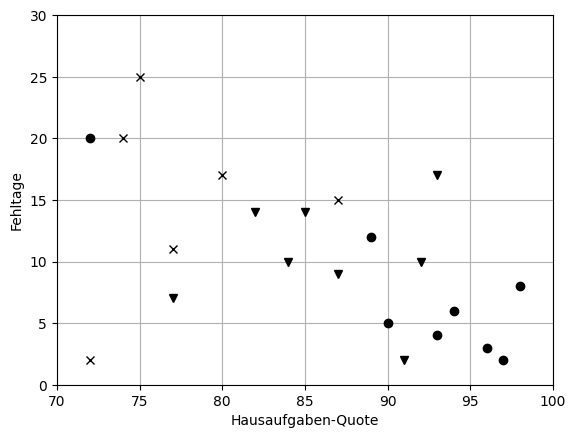

In [5]:
import matplotlib.pyplot as plt
plt.ylabel("Fehltage")
plt.xlabel("Hausaufgaben-Quote")
plt.axis([70, 100, 0, 30])
#plt.axis("square")


markers = ["ok", "vk", "xk"]  # o = Kreis, k = schwarz, v = Dreieck

for d in daten:
    marker = markers[d.label]
    plt.plot(d.ha_quote, d.fehltage, marker)

plt.grid(True)
plt.show()


### Kleine Aufgaben

In [6]:
def manhattan_dist(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

anna = (74, 20)
ben = (77, 11)
cora = (80, 17)

print(manhattan_dist(anna, ben))
print(manhattan_dist(anna, cora))
print(manhattan_dist(ben, cora))

12
9
9


In [7]:
# Gegenbeispiel, wenn man die Hausaufgaben-Quote als Prozentwert interpretiert
# und die Fehltage als absolute Anzahl
anna2 = (0.74, 20)
ben2 = (0.77, 11)
cora2 = (0.80, 17)

print(manhattan_dist(anna2, ben2))
print(manhattan_dist(anna2, cora2))
print(manhattan_dist(ben2, cora2))

9.03
3.06
6.03


### K-Means-Clustering


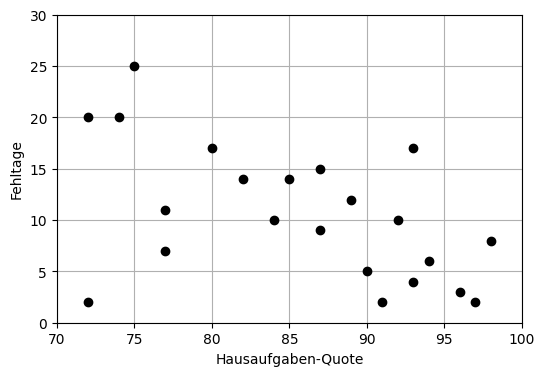

In [8]:
# Daten ohne Labels
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.ylabel("Fehltage")
plt.xlabel("Hausaufgaben-Quote")
#plt.axis("tight")
plt.axis([70, 100, 0, 30])
# plt.axis("square")

for d in daten:
    #marker = markers[d.label]
    plt.plot(d.ha_quote, d.fehltage, "ok")

plt.grid(True)
plt.savefig("Schule_Rohdaten.png")
plt.show()


In [9]:
points = [(d.ha_quote, d.fehltage) for d in daten]

## k-Means-Clustering: Algorithmus interpretieren

Seed: 629656
Stable after 9 iterations


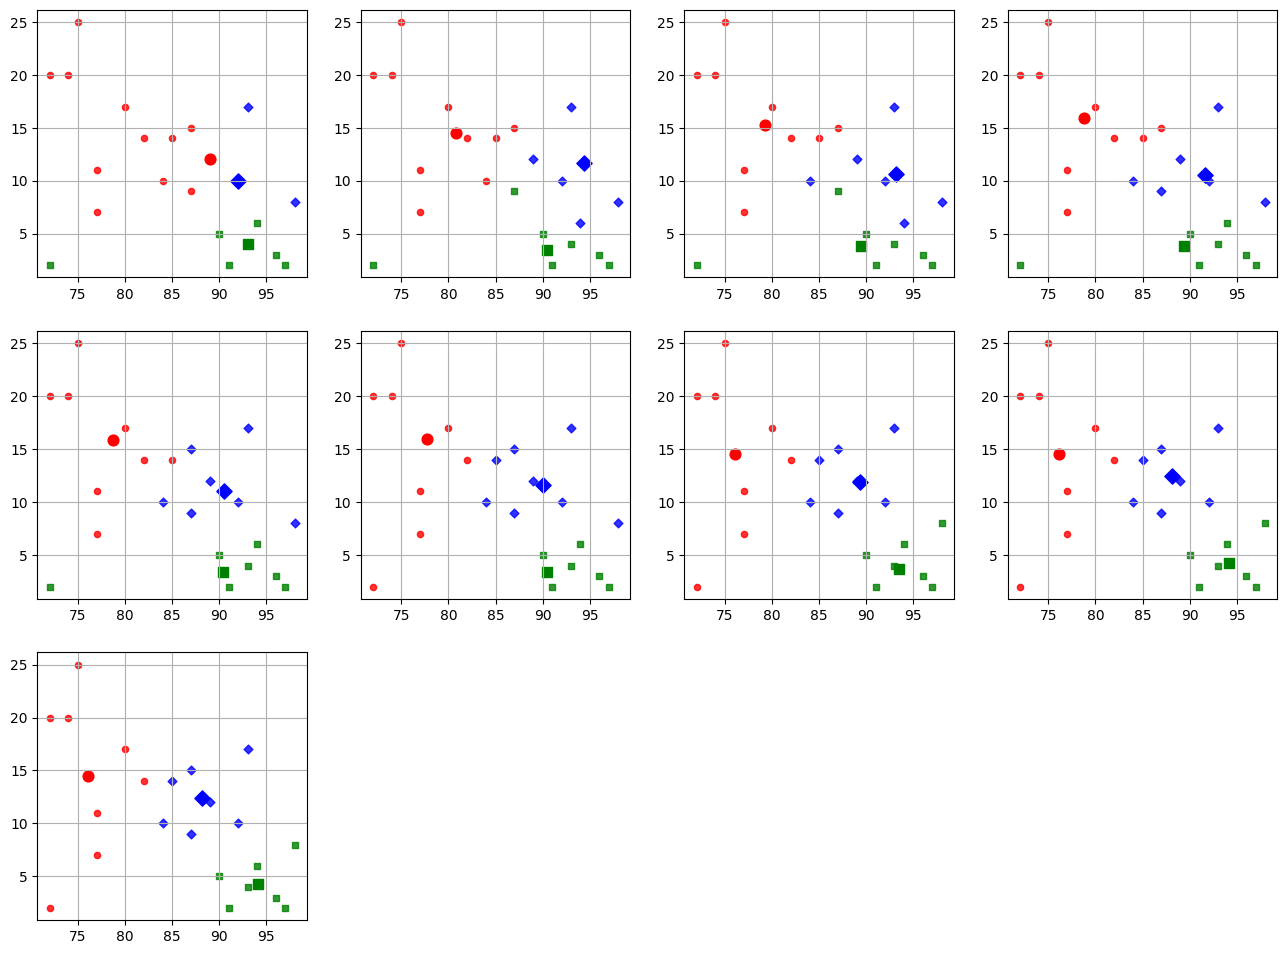

In [10]:
from random import randint
import random

k = 3

# def euclidian_dist(p1, p2):
#     return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

def manhattan_dist(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

plt.figure(figsize=(16, 16))
colors = ['r', 'g', 'b']
symbols = ['o', 's', 'D'] 

def add_plot(centroids, n, clusters):
    cxs, cys = zip(*centroids)
    plt.subplot(4, 4, n)
    plt.grid(True)
    for i in range(k):
        xs, ys = zip(*clusters[i])
        plt.scatter(xs, ys, c=colors[i], marker=symbols[i], s=20, alpha=0.8)
        plt.scatter(cxs[i], cys[i], c=colors[i], marker=symbols[i], s=60)

# 0. Random seed ausgeben und setzen
seed = randint(0, 1000000)
# seed = 259254   # Auskommentieren um einen bestimmten Seed zu verwenden
print("Seed:", seed)
random.seed(seed)


# 1. Zufällige Startpositionen der Clusterzentren aus den Punkten samplen
centroids = random.sample(points, k)

round = 1
stable_centroids = False

while not stable_centroids:
    # 2. Zuordnung der Punkte zu den Clusterzentren
    clusters = [[] for _ in range(k)]
    for p in points:
        distances = [manhattan_dist(p, c) for c in centroids]
        indx = distances.index(min(distances))
        clusters[indx].append(p)

    add_plot(centroids, round, clusters)
    
    # 3. Neuberechnung der Clusterzentren
    old_centroids = centroids[:]
    for i in range(k):
        if clusters[i]:
            xs, ys = zip(*clusters[i])
            centroids[i] = (sum(xs) / len(xs), sum(ys) / len(ys))

    # 4. prüfen ob sich die Clusterzentren verändert haben
    if old_centroids == centroids:
        stable_centroids = True
    round += 1 

add_plot(centroids, round, clusters)
print(f"Stable after {round} iterations")
plt.savefig(f"k_means_seed_{seed}.svg", format="svg")
plt.show()


### Version 2: Clustering direkt mit der Datensatz-Klasse

Seed: 608091
Stabil nach 5 Iterationen.
SVG-Datei schule_seed_608091.svg gespeichert.


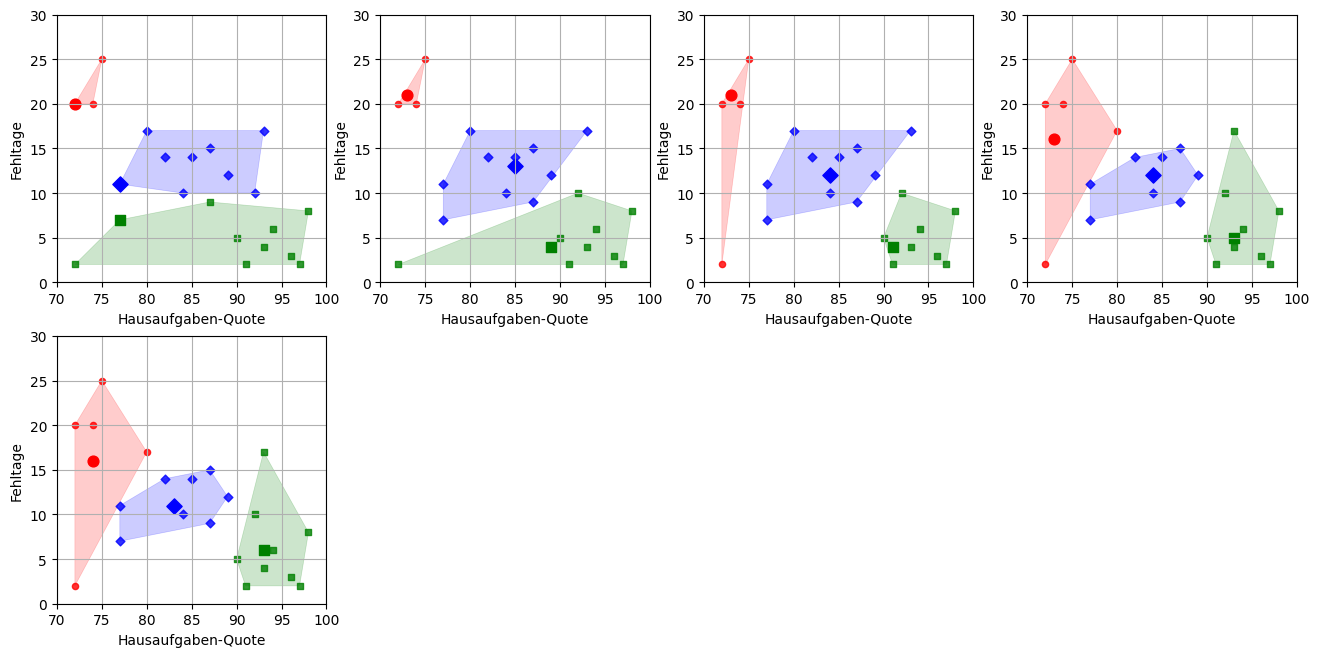

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
from scipy.spatial import ConvexHull

colors = ['r', 'g', 'b']
symbols = ['o', 's', 'D'] 

def add_plot(centroids: list[Datensatz], n, clusters):
    plt.ylabel("Fehltage")
    plt.xlabel("Hausaufgaben-Quote")
    plt.axis([70, 100, 0, 30])
    plt.grid(True)

    for i in range(k):
        cluster = clusters[i]
        points = [(d.ha_quote, d.fehltage) for d in cluster]
        if len(cluster) > 2:
            hull = ConvexHull(points)
            arr = np.array(points)
            plt.fill(arr[hull.vertices,0], arr[hull.vertices,1], c=colors[i], lw=0.5, alpha=0.2)
        xs, ys = zip(*points)
        plt.scatter(xs, ys, c=colors[i], marker=symbols[i], s=20, alpha=0.8)
        cx, cy = centroids[i].ha_quote, centroids[i].fehltage
        plt.scatter(cx, cy, c=colors[i], marker=symbols[i], s=60)



def bester_cluster(d: Datensatz, zentren: list[Datensatz]) -> int:
    # Zuordnung des Datensatzes d zu einem Cluster
    # 1. Berechnung der Distanz zu allen Clusterzentren
    dists = [d.manhattan(z) for z in zentren]
    # 2. Zuordnung zu dem Cluster mit dem kleinsten Abstand
    bester = 0
    for i in range(1, len(dists)):
        if dists[i] < dists[bester]:
            bester = i
    return bester

def zentrum_bestimmen(cluster: list[Datensatz]) -> Datensatz:
    xs = [d.ha_quote for d in cluster]
    ys = [d.fehltage for d in cluster]
    mx, my = sum(xs) // len(xs), sum(ys) // len(ys)
    return Datensatz(mx, my)

def zentrum_bestimmen2(ha_quoten: list[int], fehltage: list[int]) -> list[float]:
    summe_ha = 0
    for q in ha_quoten:
        summe_ha += q
    summe_fehltage = 0
    for f in fehltage:
        summe_fehltage += f
    avg_ha = summe_ha / len(ha_quoten)
    avg_fehltage = summe_fehltage / len(fehltage)
    return [avg_ha, avg_fehltage]


# Version des K-Means Algorithmus, die direkt mit den Datensätzen arbeitet
# und die Clusterzentren als Datensätze speichert
def k_means(daten: list[Datensatz], k: int, use_subplots=False) -> list[list[Datensatz]]:
    if use_subplots:
        plt.figure(figsize=(16, 16))
    else:   
        plt.figure(figsize=(4, 4))

    # 1. Zufällige Startpositionen der Clusterzentren aus den Daten samplen:
    cluster: list[list[Datensatz]] = []
    zentren: list[Datensatz] = random.sample(daten, k)
    
    runde = 1
    while True:
    
        # 2. Zuordnung der Daten zu den Clusterzentren:
        cluster = [[] for _ in range(k)]  # leere Cluster
        for d in daten:
            indx = bester_cluster(d, zentren)
            cluster[indx].append(d)

        if use_subplots:
            plt.subplot(4, 4, runde)
            add_plot(zentren, runde, cluster)
        else:
            add_plot(zentren, runde, cluster)
            break
    
        # 3. Neuberechnung der Clusterzentren:
        # Kurzfassung: neue_zentren = [zentrum_bestimmen(c) for c in cluster]
        neue_zentren = []
        for datensätze in cluster:
            zentrum = zentrum_bestimmen(datensätze)
            neue_zentren.append(zentrum)
    
        # 4. prüfen ob sich die Clusterzentren verändert haben:
        if zentren == neue_zentren:
            break  # Keine Veränderung mehr -> fertig
        else:
            zentren = neue_zentren
            runde += 1
    
    print(f"Stabil nach {runde} Iterationen.")
    filename = f"schule_seed_{seed}.svg"
    plt.savefig(filename, format="svg")
    print(f"SVG-Datei {filename} gespeichert.")
    return cluster


# 0. Random seed ausgeben und setzen
seed = randint(0, 1000000)
seed = 608091   # Auskommentieren um einen bestimmten Seed zu verwenden
print("Seed:", seed)
random.seed(seed)

    
clusters = k_means(daten, 3, use_subplots=True)
# clusters

### Wie homogen sind die Cluster?

In [12]:
from collections import Counter
from fractions import Fraction

# Bestimme wie homogen die Cluster sind


def homogenitaet(cluster: list[Datensatz]) -> Fraction:
    ctr = Counter(d.label for d in cluster)
    anzahl_haeufigste = ctr.most_common(1)[0][1]  # Anzahl des häufigsten Labels
    return Fraction(anzahl_haeufigste, len(cluster))

def homogenitaet_einfach(cluster: list[Datensatz]) -> float:
    häufigkeiten = [0 for _ in range(len(cluster))]  # maximal so viele Labels wie Clusterlänge
    for d in cluster:
        häufigkeiten[d.label] += 1
    n = len(cluster)
    relative_häufigkeiten = [h / n for h in häufigkeiten]
    return max(relative_häufigkeiten)

def ist_einheitlich_ds(cluster: list[Datensatz]) -> bool:
    labels = [d.label for d in cluster]
    return ist_einheitlich(labels)

def ist_einheitlich(labels: list[int]) -> bool:
    # True, wenn mehr als die Hälfte der Datenpunkte das gleiche Label haben
    häufigkeiten = [0, 0, 0]
    for label in labels:
        häufigkeiten[label] += 1
    n = len(labels)
    häufigstes = max(häufigkeiten)
    return häufigstes > n / 2

def istEinheitlich(labels: list[int]) -> bool:
    häufigkeiten = [0, 0, 0]
    for label in labels:
        häufigkeiten[label] = häufigkeiten[label] + 1
    n = len(labels)
    häufigstes = max(häufigkeiten)
    return häufigstes > n / 2


def homogenitaet_anzeigen(clusters: list[list[Datensatz]]):
    for i, cluster in enumerate(clusters):
        h = homogenitaet(cluster)
        f = float(h)
        print(f"Cluster {i}: {homogenitaet(cluster)} = {f:.2f}")
        # print(f"Cluster {i}: {homogenitaet_einfach(cluster)}")
    avg = float(sum(homogenitaet(c) for c in clusters) / len(clusters))
    print(f"Durchschnittliche Homogenität: {avg:.2f}")


### Visualisierung der Cluster *und* der vorgegebenen Labels
- Cluster: farbig
- Label: Symbole (wie in Musteraufgabe)

Seed: 196785
Stabil nach 1 Iterationen.
SVG-Datei schule_seed_196785.svg gespeichert.
Cluster 0: 3/4 = 0.75
Cluster 1: 3/5 = 0.60
Cluster 2: 3/4 = 0.75
Durchschnittliche Homogenität: 0.70
Datei schule_seed_196785_Label.svg gespeichert.


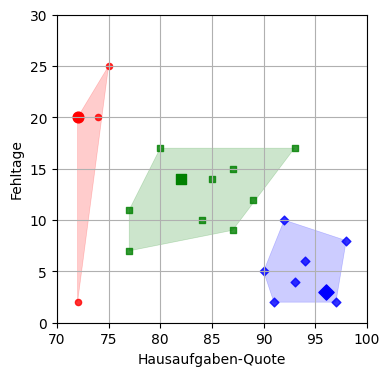

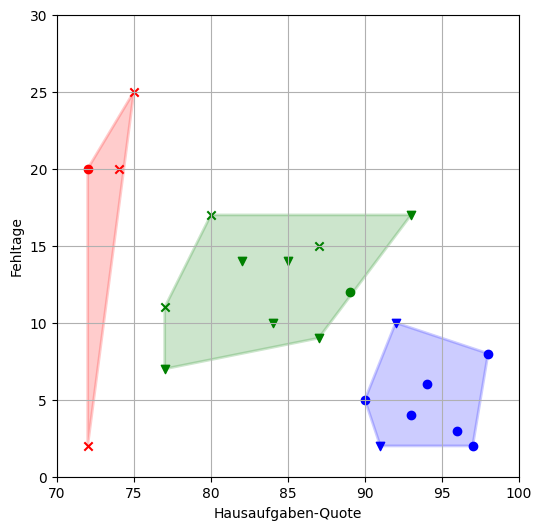

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
from scipy.spatial import ConvexHull



# 0. Random seed ausgeben und setzen
seed = randint(0, 1000000)
# seed = 926255   # Sehr gute (= homogene) Cluster: Durchschnittliche Homogenität: 0.68
print("Seed:", seed)
random.seed(seed)


clusters = k_means(daten, 3, use_subplots=False)
# clusters = k_means(daten, 4)

homogenitaet_anzeigen(clusters)


markers = ['o', 'v', 'x', 's']
colors = ['r', 'g', 'b', 'k']

plt.figure(figsize=(6, 6))
plt.ylabel("Fehltage")
plt.xlabel("Hausaufgaben-Quote")
plt.axis([70, 100, 0, 30])
plt.axis("square")
plt.grid(True)

show_labels = True

for cluster, color in zip(clusters, colors):
    # Konvexe Hülle der Punkte des Clusters zeichnen:
    if len(cluster) > 2:
        cpoints = np.array([(d.ha_quote, d.fehltage) for d in cluster])
        hull = ConvexHull(cpoints)
        plt.fill(cpoints[hull.vertices,0], cpoints[hull.vertices,1], c=color, lw=2, alpha=0.2)  # https://stackoverflow.com/questions/36250793/how-to-fill-an-area-within-a-polygon-in-python-using-matplotlib
    # Einzelne Punkte des Clusters zeichnen:
    for d in cluster:
        if show_labels:
            plt.scatter(d.ha_quote, d.fehltage, c=color, marker=markers[d.label])  # zeige die echten Labels an
        else:
            plt.scatter(d.ha_quote, d.fehltage, c=color, marker=markers[cluster[0].label])  # zeige die Cluster-Labels an

label_str = "Label" if show_labels else "Cluster"
filename = f"schule_seed_{seed}_{label_str}.svg"
plt.savefig(filename, format="svg")
print(f"Datei {filename} gespeichert.")
plt.show()